In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the data
heart_data = pd.read_csv('heartdisease_data.csv')
heart_data

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [4]:
input_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                  'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

In [5]:
# Naming columns
heart_data.columns = input_features

In [6]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [7]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [8]:
heart_data.shape

(199, 14)

In [9]:
# Missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [10]:
# Checking for abnormal values
print(heart_data['age'].unique())
print(heart_data['sex'].unique())
print(heart_data['cp'].unique())
print(heart_data['trestbps'].unique()) # Need rectifiation, 
print(heart_data['chol'].unique()) # Need rectifiation
print(heart_data['fbs'].unique()) # Need rectifiation
print(heart_data['restecg'].unique())
print(heart_data['thalach'].unique()) # Need rectifiation
print(heart_data['exang'].unique()) # Need rectifiation
print(heart_data['oldpeak'].unique()) # Need rectifiation
print(heart_data['slope'].unique()) # Need rectifiation
print(heart_data['ca'].unique()) # Need rectifiation
print(heart_data['thal'].unique()) # Need rectifiation
print(heart_data['num'].unique())

[44 60 55 66 65 56 59 62 63 57 46 58 64 74 52 69 51 54 77 61 40 41 42 53
 68 67 72 75 49 35 43 48 50 45 76 70 71 38 37]
[1 0]
[4 3 2 1]
['130' '132' '142' '110' '120' '150' '180' '160' '126' '140' '?' '128'
 '170' '152' '116' '124' '0' '122' '144' '154' '125' '104' '136' '134'
 '138' '178' '146' '135' '158' '106' '112' '102' '96' '172' '155' '156'
 '118' '100' '190' '114' '127']
['209' '218' '228' '213' '0' '236' '267' '166' '220' '177' '186' '100'
 '171' '230' '281' '203' '277' '233' '240' '153' '224' '316' '311' '270'
 '217' '214' '252' '339' '216' '276' '458' '241' '384' '297' '248' '308'
 '208' '227' '210' '245' '225' '198' '195' '161' '258' '235' '305' '223'
 '282' '349' '?' '160' '312' '283' '142' '211' '306' '222' '202' '197'
 '204' '274' '192' '298' '272' '200' '261' '181' '260' '221' '175' '219'
 '310' '232' '273' '182' '292' '289' '193' '170' '369' '173' '271' '244'
 '285' '243' '237' '165' '287' '256' '264' '226' '207' '284' '337' '254'
 '300' '333' '139' '385']
['0' '1' '?'

In [37]:
# Correcting abnormal values
heart_data['trestbps'].replace('?', heart_data['trestbps'].min(), inplace=True)
heart_data['chol'].replace('?', heart_data['chol'].min(), inplace=True)
heart_data['fbs'].replace('?', heart_data['fbs'].min(), inplace=True)
heart_data['thalach'].replace('?', heart_data['thalach'].min(), inplace=True)
heart_data['exang'].replace('?', heart_data['exang'].min(), inplace=True)
heart_data['oldpeak'].replace('?', heart_data['oldpeak'].min(), inplace=True)
heart_data['slope'].replace('?', heart_data['slope'].min(), inplace=True)
heart_data['ca'].replace('?', heart_data['ca'].min(), inplace=True)
heart_data['thal'].replace('?', heart_data['thal'].min(), inplace=True)

In [38]:
print(heart_data['age'].unique())
print(heart_data['sex'].unique())
print(heart_data['cp'].unique())
print(heart_data['trestbps'].unique()) 
print(heart_data['chol'].unique())
print(heart_data['fbs'].unique()) 
print(heart_data['restecg'].unique())
print(heart_data['thalach'].unique())
print(heart_data['exang'].unique()) 
print(heart_data['oldpeak'].unique())
print(heart_data['slope'].unique())
print(heart_data['ca'].unique()) 
print(heart_data['thal'].unique())
print(heart_data['num'].unique())

[44 60 55 66 65 56 59 62 63 57 46 58 64 74 52 69 51 54 77 61 40 41 42 53
 68 67 72 75 49 35 43 48 50 45 76 70 71 38 37]
[1 0]
[4 3 2 1]
['130' '132' '142' '110' '120' '150' '180' '160' '126' '140' '0' '128'
 '170' '152' '116' '124' '122' '144' '154' '125' '104' '136' '134' '138'
 '178' '146' '135' '158' '106' '112' '102' '96' '172' '155' '156' '118'
 '100' '190' '114' '127']
['209' '218' '228' '213' '0' '236' '267' '166' '220' '177' '186' '100'
 '171' '230' '281' '203' '277' '233' '240' '153' '224' '316' '311' '270'
 '217' '214' '252' '339' '216' '276' '458' '241' '384' '297' '248' '308'
 '208' '227' '210' '245' '225' '198' '195' '161' '258' '235' '305' '223'
 '282' '349' '160' '312' '283' '142' '211' '306' '222' '202' '197' '204'
 '274' '192' '298' '272' '200' '261' '181' '260' '221' '175' '219' '310'
 '232' '273' '182' '292' '289' '193' '170' '369' '173' '271' '244' '285'
 '243' '237' '165' '287' '256' '264' '226' '207' '284' '337' '254' '300'
 '333' '139' '385']
['0' '1']
[1 2 0]
['

In [39]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,44,1,4,130,209,0,1,127,0,0,1,0,3,0
1,60,1,4,132,218,0,1,140,1,1.5,3,0,3,2
2,55,1,4,142,228,0,1,149,1,2.5,1,0,3,1
3,66,1,3,110,213,1,2,99,1,1.3,2,0,3,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,1,0,3,1
195,62,1,1,0,139,0,1,100,0,-0.5,1,0,3,0
196,55,1,4,122,223,1,1,100,0,0,1,0,6,2
197,58,1,4,0,385,1,2,100,0,-0.5,1,0,3,0


# Data exploration

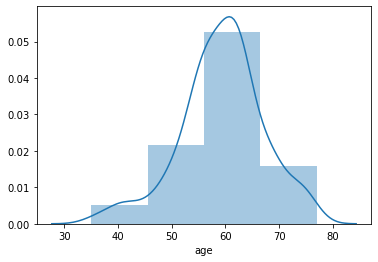

In [40]:
sns.distplot(heart_data["age"], bins=4)

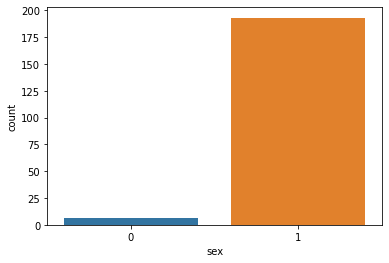

In [41]:
sns.countplot(heart_data["sex"])

In [42]:
total = len(heart_data["sex"])
males = heart_data["sex"].sum()
females = len(heart_data["sex"]) - males
print("Percentage of males:", round(males/total*100, 2))
print("percentage of females:", round(females/total*100, 2))

Percentage of males: 96.98
percentage of females: 3.02


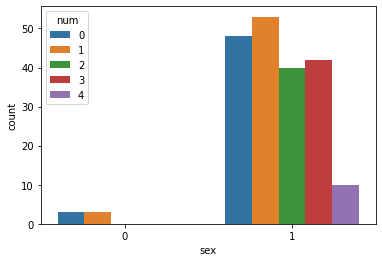

In [43]:
sex_graph = sns.countplot(heart_data["sex"], hue=heart_data["num"])

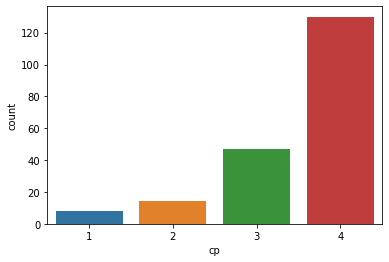

In [44]:
cp_graph = sns.countplot(heart_data["cp"])

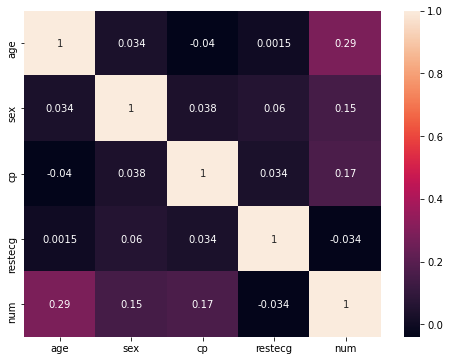

In [45]:
plt.figure(figsize=(8, 6))
sns.heatmap(heart_data.corr(), annot=True)

In [46]:
heart_data.dtypes

age          int64
sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

# Machine Learning

In [58]:
# Getting features and target
x = heart_data.drop(["num"], axis=1)
y = heart_data["num"]

In [59]:
# Data splitting/parameter tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


# ML models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Feature processing
from sklearn.feature_selection import SelectPercentile, chi2

# Evaluation metrics
from sklearn.metrics import confusion_matrix

In [60]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Training & Predicting using Logistic Regression()

In [61]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [62]:
y_pred = logmodel.predict(x_test)

In [63]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)  

array([[5, 0, 2, 1, 0],
       [2, 2, 2, 3, 0],
       [2, 3, 2, 5, 0],
       [3, 1, 2, 4, 0],
       [1, 0, 0, 0, 0]], dtype=int64)

#  Training & Predicting using KNN Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier_knn.fit(x_train, y_train)
y_pred = classifier_knn.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[5, 1, 2, 0, 0],
       [3, 3, 2, 1, 0],
       [6, 6, 0, 0, 0],
       [3, 2, 2, 3, 0],
       [1, 0, 0, 0, 0]], dtype=int64)

# Training & Predicting using Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(x_train, y_train)
y_pred = classifier_nb.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[3, 0, 0, 0, 5],
       [1, 0, 2, 2, 4],
       [0, 0, 1, 2, 9],
       [1, 0, 2, 2, 5],
       [0, 0, 0, 0, 1]], dtype=int64)

# Training & Predicting using Decision Tree Classifier

In [66]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy')
classifier_dt.fit(x_train, y_train)
y_pred = classifier_dt.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[5, 1, 0, 2, 0],
       [1, 3, 1, 4, 0],
       [1, 2, 5, 3, 1],
       [3, 0, 2, 4, 1],
       [0, 1, 0, 0, 0]], dtype=int64)

# Training & Predicting using Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 3, criterion='entropy')
classifier_rf.fit(x_train, y_train)
y_pred = classifier_rf.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[4, 2, 1, 1, 0],
       [4, 3, 1, 1, 0],
       [5, 2, 2, 3, 0],
       [4, 2, 2, 2, 0],
       [1, 0, 0, 0, 0]], dtype=int64)

# End of EDA